# Exercise Fourteen: Project Design Starter
In this exercise, you'll be planning out a complex project. You'll draw in some code, but focus on commenting to describe your project structure. The sample document below will guide you through organizing and annotating your project design. The primary components you'll include are:

- Dependencies: What modules will your project need?
- Collection: Where is your data coming from?
- Processing: How will you format and process your data?
- Analysis: What techniques will you use to understand your data?
- Visualization: How will you visualize and explore your data?

# Project Overview
I plan on extracting information from Twitter using #BlerDCon. BlerDcon is a convention — the event’s name signals that it specifically caters to blerds (black nerds), BlerDCon is an inclusive space for all POC, LGBTQ+, female, and disabled fans. Pulling data from the 2021 convention, I seek to gather more information and insight into the topics dicussed around this venue and the sentiments of the participants. 

I noticed that a lot of people were upset about a cosplay contest being won by a white woman and a lot of people were reasonably upset and irriatated - especially since the convention id dedicated to "Black Nerds" and is intended to be a safe place for Queer POC specifically.

I wanted to pull twitter comments (since thats where I found the most activity on the topic) to seach sentiments around the topic and see how it was being discussed. 

# Dependencies
Importing modules to extract data from hastags on twitter, compile that information into a digestible list, and then use that info to create visualizations for the data.

In [3]:
# Importing Config to pull credentials for Twitter API
import configparser

#Importing Twitter API
import tweepy

#To turn data into a CSV file
import csv

#Importing to help extract data
import requests
from bs4 import BeautifulSoup

#Importing to map out geographical locations of responses
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#importing to plot findings in visualization
import matplotlib.pyplot as plt

#importing for map visualization
import cartopy.crs as ccrs
from matplotlib.patches import Circle

#importing to assist in compliling 
import re

#Importing for punctuation
from nltk.tokenize import WordPunctTokenizer

#importing to make a wordcloud for visualizations
from wordcloud import WordCloud, STOPWORDS

#To turn work cloud into an image
import numpy as np
from PIL import Image
import random

#Importing to gather sentiments from comments
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Importing Pandas to handle collected Twitter data 
import pandas as pd

#trying a new scraper since Tweepy only pulls recent tweets
import snscrape.modules.twitter as sntwitter

# Collection
Collecting data from recent 2021 convention hastag #BlerDcon. Starting date from pull will begin 01-01-2021 to current time. This can be changed later to look into other year conventions. 

Tried to change to #BlerDCon to widen paramaters, but since I got this new way to work I went back to the specific convention.

I checked other avenues of collecting "customer feedback" but Twitter seems to contain the most.

In [4]:
#Scraping Twitter for tweets with "BlerDCon2021" and gathering them onto a CSV file.
keyword = 'BlerDCon2021'
maxTweets = 30000

#Open/create a file to append data to
csvFile = open('BlerDCon2021.csv', 'a', newline='', encoding='utf8')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['id','date','tweet'])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' since:2021-06-01 until:2021-12-16').get_items()) :
        if i > maxTweets :
            break
        csvWriter.writerow([tweet.id, tweet.date, tweet.renderedContent])
csvFile.close()

# Processing

The goal here is to process the csv in a way that can be used for keyword analaysis, for a word cloud, but also check for frequency of certain key topics ot key points. 

In [8]:
df = pd.read_csv('BlerDCon2021.csv')

# Prints how pd will structure data types
print(df.dtypes)

id       object
date     object
tweet    object
dtype: object


In [9]:
#printing all of it
df = pd.read_csv ('BlerDCon2021.csv')
print(df)

                      id                       date  \
0                     id                       date   
1    1465358257116098566  2021-11-29 16:33:28+00:00   
2    1459195661610631179  2021-11-12 16:25:30+00:00   
3    1454791727311642625  2021-10-31 12:45:51+00:00   
4    1451208032088641547  2021-10-21 15:25:31+00:00   
..                   ...                        ...   
833  1406028237000564744  2021-06-18 23:17:09+00:00   
834  1404281025296056328  2021-06-14 03:34:21+00:00   
835  1402462042049626113  2021-06-09 03:06:21+00:00   
836  1400996999860793347  2021-06-05 02:04:48+00:00   
837  1400587817361739782  2021-06-03 22:58:51+00:00   

                                                 tweet  
0                                                tweet  
1    @noobde My favorite Mortal Kombat character si...  
2    Happy Friday from ur favorite digimon team eve...  
3    Cosplayers at a con VS Cosplayers on Halloween...  
4    Mood!! n it's only 11am 🤣, blerdcon was def a ...

In [10]:
#Setting parameter of the users tweet
df = pd.read_csv('BlerDCon2021.csv')
df = df.set_index('tweet')
df.head()

,id,date
tweet,,
tweet,id,date
@noobde My favorite Mortal Kombat character since 1992...SUB-ZERO...Me as Sub-Zero and @BanzaiWolf_FC (Noob Saibot) and my friend Launa as Sindel :) #BlerDCon2021 https://t.co/bQQSAIQ2hv,1465358257116098566,2021-11-29 16:33:28+00:00
Happy Friday from ur favorite digimon team everyone! \nTai: @UnderCover16 \nBlackwargreymon: Swaggy\n\n#tai #blackwargreymon #wargreymon #digimon #cosplayers #blerdcon2021 #digimoncosplay https://t.co/cp1zKrhKh4,1459195661610631179,2021-11-12 16:25:30+00:00
Cosplayers at a con VS Cosplayers on Halloween\n.\n.\n#Hyoga - 1st pic..made this cosplay\n#SteveUrkel - Quick #closetcosplay\n\nLol p.s. I love seeing everyone bring it \n.\n.\n#convshalloween #DrStone #familymatters #steveurkel #happyholloween #blerdcon2021 #sexynerd #wendellcosplays https://t.co/c06kViw7ls,1454791727311642625,2021-10-31 12:45:51+00:00
"Mood!! n it's only 11am 🤣, blerdcon was def a good time!\nPhoto taken by: @majide.photography \n\n#duffman #blerdcon2021 #thesimpsons #cosplay #tbt https://t.co/SqxapO3QLC",1451208032088641547,2021-10-21 15:25:31+00:00


In [17]:
#trying to turn the CSV file into a text file to search word freq.

# reading csv file
text = open("BlerDCon2021.csv", "r")
  
# joining with space content of text
text = ' '.join([i for i in text])  
  
# replacing ',' by space
text = text.replace(",", " ")  
  
#displaying result
print(text)

#save as txt file
f = open('BlerDCon2021.txt','w')
f.write(text)
f.close()

id date tweet
 id date tweet
 1465358257116098566 2021-11-29 16:33:28+00:00 @noobde My favorite Mortal Kombat character since 1992...SUB-ZERO...Me as Sub-Zero and @BanzaiWolf_FC (Noob Saibot) and my friend Launa as Sindel :) #BlerDCon2021 https://t.co/bQQSAIQ2hv
 1459195661610631179 2021-11-12 16:25:30+00:00 "Happy Friday from ur favorite digimon team everyone! 
 Tai: @UnderCover16  
 Blackwargreymon: Swaggy
 
 #tai #blackwargreymon #wargreymon #digimon #cosplayers #blerdcon2021 #digimoncosplay https://t.co/cp1zKrhKh4"
 1454791727311642625 2021-10-31 12:45:51+00:00 "Cosplayers at a con VS Cosplayers on Halloween
 .
 .
 #Hyoga - 1st pic..made this cosplay
 #SteveUrkel - Quick #closetcosplay
 
 Lol p.s. I love seeing everyone bring it 
 .
 .
 #convshalloween #DrStone #familymatters #steveurkel  #happyholloween  #blerdcon2021 #sexynerd #wendellcosplays https://t.co/c06kViw7ls"
 1451208032088641547 2021-10-21 15:25:31+00:00 "Mood!! n it's only 11am 🤣  blerdcon was def a good time!
 Photo t

In [18]:
#turn into lowercase
text = text.lower()

#wordbag
word_bag = re.compile(r'\W+', re.UNICODE).split(text)
print(word_bag[0:100])

['id', 'date', 'tweet', 'id', 'date', 'tweet', '1465358257116098566', '2021', '11', '29', '16', '33', '28', '00', '00', 'noobde', 'my', 'favorite', 'mortal', 'kombat', 'character', 'since', '1992', 'sub', 'zero', 'me', 'as', 'sub', 'zero', 'and', 'banzaiwolf_fc', 'noob', 'saibot', 'and', 'my', 'friend', 'launa', 'as', 'sindel', 'blerdcon2021', 'https', 't', 'co', 'bqqsaiq2hv', '1459195661610631179', '2021', '11', '12', '16', '25', '30', '00', '00', 'happy', 'friday', 'from', 'ur', 'favorite', 'digimon', 'team', 'everyone', 'tai', 'undercover16', 'blackwargreymon', 'swaggy', 'tai', 'blackwargreymon', 'wargreymon', 'digimon', 'cosplayers', 'blerdcon2021', 'digimoncosplay', 'https', 't', 'co', 'cp1zkrhkh4', '1454791727311642625', '2021', '10', '31', '12', '45', '51', '00', '00', 'cosplayers', 'at', 'a', 'con', 'vs', 'cosplayers', 'on', 'halloween', 'hyoga', '1st', 'pic', 'made', 'this', 'cosplay', 'steveurkel']


In [21]:
#making an array for word count
def wordsToDictionary(word_bag):
    word_freq = [word_bag.count(word) for word in word_bag]
    return dict(list(zip(word_bag,word_freq)))

# Analysis
Would like to analyze the CSV file for common key terms and number of times a topic is mentioned. From their try to build out sentiments of users. 

Changed the code to focus on tweets from people who used to word "white" -- should append the file in the future to only hold those comments to serve as the dataset. I believe I also have to turn this into a txt file and then it might be easier to collect keywords and build out from there.



In [11]:
 #searching for "white" as keyword in CSV to look for comments specific to controversy around 2021 cosplay winner.
 #winner was a white woman at a convention specific to "Black Nerds"
 with open('BlerDCon2021.csv', 'r') as f:
    for line in f.readlines():
        if 'white' in line:
            print(line)

1425117591685709825,2021-08-10 15:31:25+00:00,Perfect example of white entitlement. They think should be included in everything and anything. #blerdcon #blerdcon2021 #whiteprivilege #entitlement. https://t.co/wlZ3gIOnE7

1422565418665971712,2021-08-03 14:30:00+00:00,"The Devil works hard but #BlackTikTok works even harder. I was able to find Hilton's deleted FB live video that he deleted after the white cosplay winner announced she was stepping down. Let's see what he said: youtu.be/PLqp_DFEOT0

1420168963976306699,2021-07-27 23:47:21+00:00,"I was working on a update video on this development when a commentor informed me that white cosplayers did won the blerdcon cosplay contest in previous years: Two times before!

The Caucasian white cosplayer who was cosplaying Sakura from Cardcaptor Sakura who won blerdcons 2021 cosplay contest has stepped down and a new winner has been  announced to the dismay of people who actually think she earned it.

1418525096990412801,2021-07-23 10:55:12+00:

In [ ]:
# List most common words
#removed print so output doesnt take up too much space
def sortDictionary(counted_words):
    # Store new list to go through and track word counts to sort by count and reverse so we have counted words in order.  So we can see most common words to least common word.  Orders to fq, not to word.
    aux = [(counted_words[key], key) for key in counted_words]
    aux.sort()
    aux.reverse()
    return aux

counted_words = sortDictionary(counted_words)

In [28]:
# Querying for certain key words and printing their frequency
#not useful for this dataset
occurrences = word_bag.count("white")
print('Number of occurrences of the word white :', occurrences)

occurrences = word_bag.count("cosplay")
print('Number of occurrences of the word cosplay :', occurrences)

occurrences = word_bag.count("contest")
print('Number of occurrences of the word contest :', occurrences)

occurrences = word_bag.count("winner")
print('Number of occurrences of the word winner :', occurrences)

Number of occurrences of the word white : 25
Number of occurrences of the word cosplay : 192
Number of occurrences of the word contest : 29
Number of occurrences of the word winner : 14


# Visualization
The goal was to create a word cloud with common topics from the hashtag and place it over the logo for the conference. A Bokeh chart would be helpful here as well.

I think in the future, I can review keytopics from CSV and categorize them, so that visualizations will be easier and make sense.

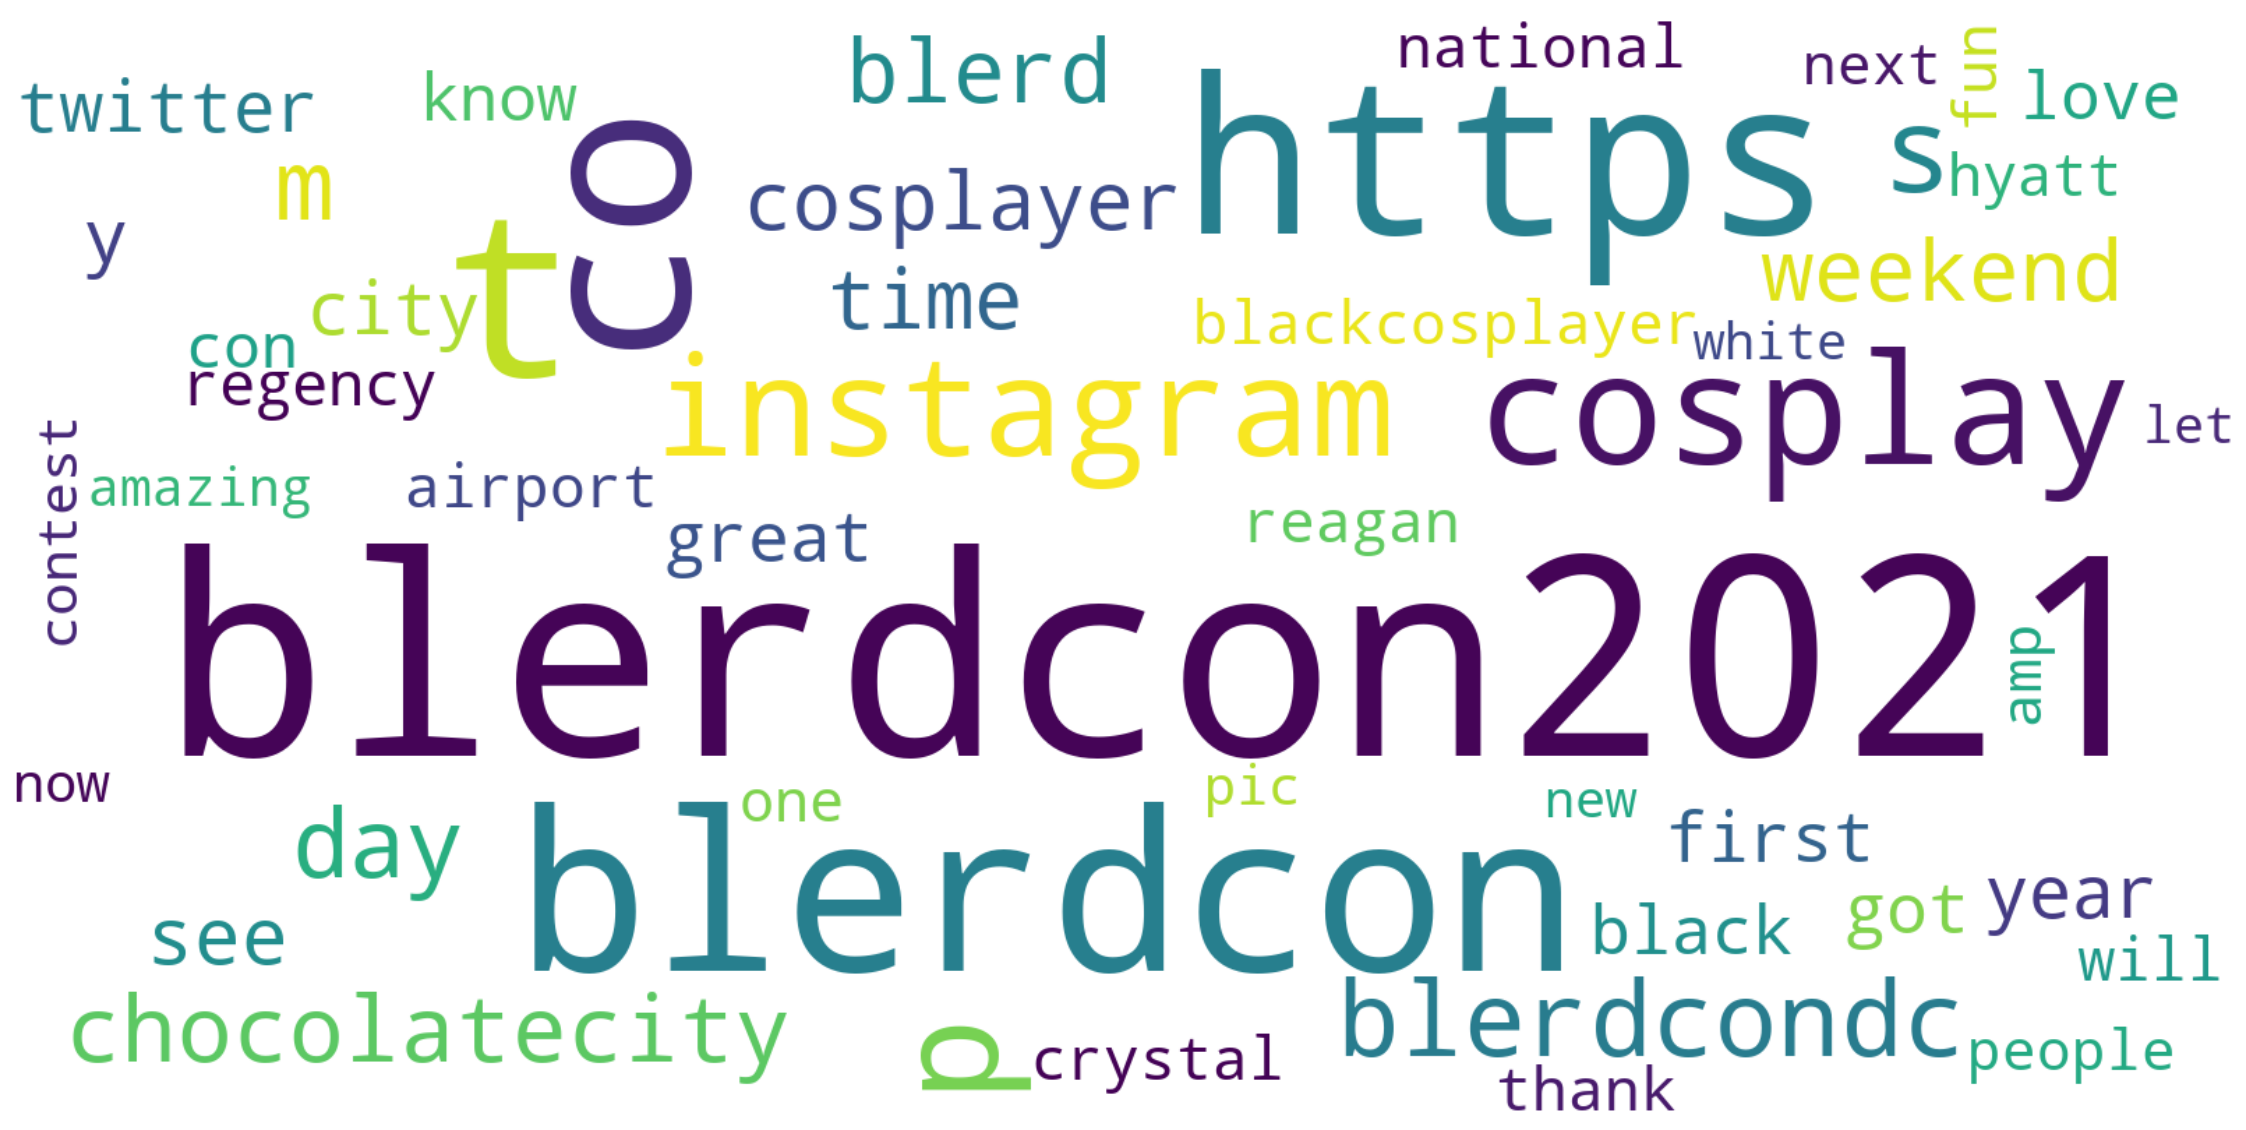

In [35]:
#Attempting a wordcloud
string = pd.Series(word_bag).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()